# **9. Contour Detection & Object Measurement**


In many computer vision tasks, detecting an object is only the first step.
After locating objects, we often want to answer questions such as:

* How big is the object?
* What is its shape?
* Where is its center?
* Is it circular, rectangular, elongated?
Can we draw a tight bounding box around it?

To solve these problems, OpenCV provides an extremely useful feature: Contour Detection

A contour is a set of connected boundary points that represent the outline of an object.
Contours allow us to move from raw pixels to meaningful shape information.

Contours are widely used in:

* Object counting (fruits, coins, cells)
* Shape classification (butterfly wings, traffic signs)
* Measurement systems (industrial inspection)
* Tracking and robotics
* Document scanning (Sudoku, chessboard grids)

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8)
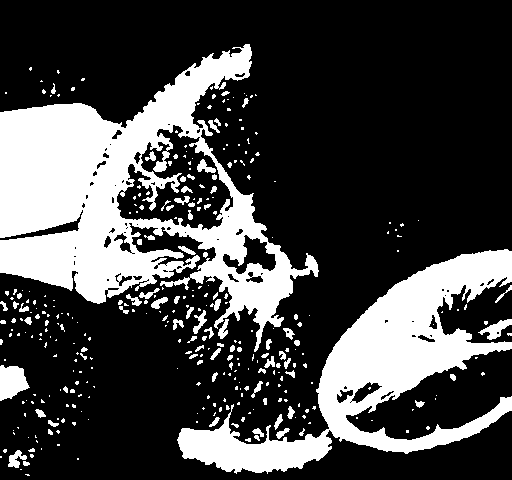

In [ ]:
import cv2

# Load image
img = cv2.imread("fruits.jpg")

# Convert to grayscale
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# Blur to reduce noise
blur = cv2.GaussianBlur(gray, (5, 5), 0)

# Threshold to create binary image
_, thresh = cv2.threshold(blur, 120, 255, cv2.THRESH_BINARY)

thresh

## **9.1. Finding Contours**

Key Parameters:

* Retrieval Mode
  * RETR_EXTERNAL → only outer contours
  * RETR_TREE → full hierarchy (useful for Sudoku/chessboard)
* Approximation Mode
  * CHAIN_APPROX_SIMPLE → stores fewer points (efficient)
  * CHAIN_APPROX_NONE → stores every boundary pixel (detailed)


Each contour is a list of boundary coordinates.

In [ ]:
contours, hierarchy = cv2.findContours(
    thresh,
    cv2.RETR_EXTERNAL,
    cv2.CHAIN_APPROX_SIMPLE
)

print("Contours detected:", len(contours))

Contours detected: 303


## **9.2. Drawing Contours**

array([[[ 13,  62, 130],
        [ 14,  63, 131],
        [ 15,  64, 134],
        ...,
        [ 77,  73,  68],
        [ 72,  70,  69],
        [ 67,  67,  67]],

       [[ 18,  67, 137],
        [ 18,  67, 137],
        [ 17,  65, 137],
        ...,
        [ 60,  58,  57],
        [ 66,  62,  61],
        [ 70,  66,  65]],

       [[ 18,  65, 139],
        [ 17,  64, 138],
        [ 15,  61, 138],
        ...,
        [ 42,  38,  43],
        [ 53,  51,  50],
        [ 68,  65,  60]],

       ...,

       [[ 56, 112, 101],
        [ 58, 114, 103],
        [ 63, 116, 106],
        ...,
        [ 16,  35,  48],
        [ 17,  36,  49],
        [ 17,  36,  49]],

       [[ 52, 108,  97],
        [ 56, 109,  99],
        [ 58, 111, 101],
        ...,
        [ 16,  37,  52],
        [ 15,  36,  51],
        [ 17,  38,  53]],

       [[ 51, 107,  96],
        [ 52, 105,  95],
        [ 55, 107,  97],
        ...,
        [ 15,  38,  53],
        [ 14,  37,  52],
        [ 17,  40,  55]]], dtype=uint8)
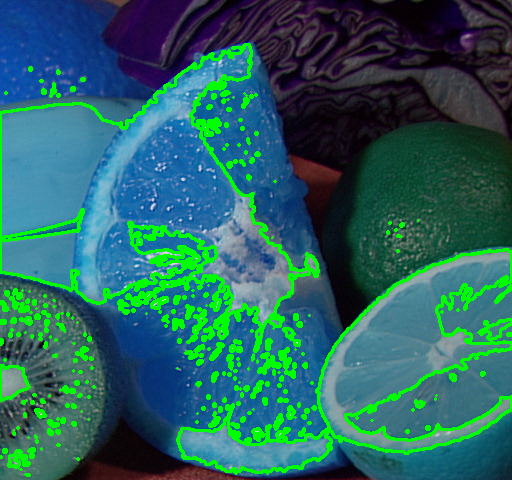

In [ ]:
output = img.copy()

cv2.drawContours(output, contours, -1, (0, 255, 0), 2)
output

## **9.3. Measuring Object Properties**
Once we have contours, we can compute geometric measurements.

In [ ]:
# Area: Area tells how many pixels are inside an object.
# Use Case: Filter noise (small contours)
#           Compare object sizes (big vs small fruit)
for c in contours:
    area = cv2.contourArea(c)
    print("Area:", area)

Area: 2.0
Area: 0.0
Area: 18.0
Area: 1.0
Area: 1.0
Area: 7.5
Area: 142.0
Area: 7.5
Area: 0.0
Area: 12.0
Area: 2.0
Area: 1.0
Area: 10.0
Area: 0.0
Area: 14.0
Area: 0.5
Area: 1.0
Area: 4.0
Area: 5.5
Area: 0.0
Area: 14.0
Area: 12.5
Area: 53.0
Area: 41.0
Area: 0.5
Area: 7.0
Area: 11.5
Area: 1.5
Area: 6.5
Area: 1.0
Area: 0.0
Area: 29.0
Area: 0.0
Area: 8.5
Area: 1.0
Area: 1.0
Area: 0.0
Area: 8.5
Area: 34.5
Area: 5.5
Area: 48.5
Area: 0.0
Area: 2.5
Area: 1.5
Area: 1.5
Area: 0.0
Area: 0.5
Area: 7.5
Area: 0.0
Area: 42.5
Area: 7.0
Area: 2.0
Area: 5.5
Area: 45.5
Area: 8.5
Area: 7.0
Area: 3.5
Area: 2.5
Area: 5.5
Area: 3.5
Area: 3.0
Area: 3.0
Area: 31.5
Area: 0.0
Area: 4.5
Area: 4.5
Area: 0.0
Area: 7.0
Area: 15.0
Area: 3.5
Area: 0.5
Area: 0.0
Area: 4.5
Area: 0.0
Area: 3.0
Area: 1.5
Area: 3.0
Area: 3.0
Area: 11.0
Area: 0.0
Area: 0.0
Area: 10.5
Area: 5.5
Area: 0.5
Area: 15.5
Area: 3.0
Area: 1.0
Area: 5.0
Area: 0.0
Area: 6.0
Area: 47.5
Area: 0.5
Area: 7.5
Area: 1.5
Area: 6.0
Area: 23.0
Area: 3.0
Area: 6

In [ ]:
# Perimeter: Perimeter is the contour boundary length. Useful for detecting irregular shapes.
perimeter = cv2.arcLength(c, True)
print("Perimeter:", perimeter)

Perimeter: 2720.6084151268005


## **9.4. Filtering Small Objects (Noise Removal)**

Often contours include unwanted noise. This is extremely useful for fruit counting.

In [ ]:
filtered = []

for c in contours:
    if cv2.contourArea(c) > 500:
        filtered.append(c)

print("Filtered contours:", len(filtered))

Filtered contours: 3


## **9.5. Bounding Boxes & Aspect Ratio**
Bounding boxes help locate objects and measure proportions.

In [ ]:
# Standard Bounding Rectangle
for c in filtered:
    x, y, w, h = cv2.boundingRect(c)
    cv2.rectangle(img, (x, y), (x+w, y+h), (255, 0, 0), 2)

In [ ]:
# Aspect Ratio Aspect ratio describes object shape:
#       AR ≈ 1 → square/circle
#       AR > 2 → elongated object
# Great for butterflies or tiger body shape analysis.

aspect_ratio = w / h
print("Aspect Ratio:", aspect_ratio)

Aspect Ratio: 1.0357142857142858


## **9.6. Minimum Area Rectangle (Rotated Box)**

Normal bounding boxes fail when objects are rotated. This is useful for:

* Chessboard pieces
* Tilted fruits
* Rotated butterflies

In [ ]:
for c in filtered:
    rect = cv2.minAreaRect(c)
    box = cv2.boxPoints(rect)
    box = box.astype(int)

    cv2.drawContours(img, [box], 0, (0, 0, 255), 2)

## **9.7. Convex Hull**

The convex hull is the smallest convex boundary that encloses the object. Applications:

* Shape smoothing
* Finger/hand detection
* Wing structure analysis

In [ ]:
for c in filtered:
    hull = cv2.convexHull(c)
    cv2.drawContours(img, [hull], -1, (255, 255, 0), 2)

## **9.8. Moments & Object Center (Centroid)**

Contours also allow finding object centers. Centroids are essential for:

* Object tracking
* Robotics grasping
* Alignment tasks

In [ ]:
for c in filtered:
    M = cv2.moments(c)

    if M["m00"] != 0:
        cx = int(M["m10"] / M["m00"])
        cy = int(M["m01"] / M["m00"])

        cv2.circle(img, (cx, cy), 6, (0, 0, 255), -1)

        print("Center:", (cx, cy))

Center: (11, 381)
Center: (377, 369)
Center: (133, 198)


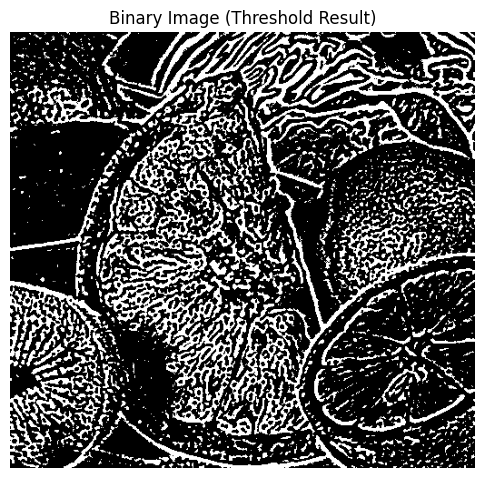


Objects detected: 13


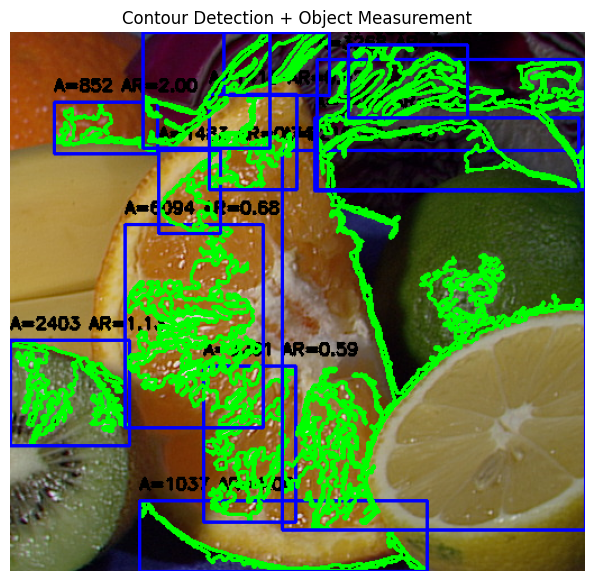

In [ ]:
import cv2
import matplotlib.pyplot as plt

# Load image
img = cv2.imread("fruits.jpg")
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
blur = cv2.GaussianBlur(gray, (5,5), 0)

# Adaptive threshold (more robust)
thresh = cv2.adaptiveThreshold(
    blur, 255,
    cv2.ADAPTIVE_THRESH_GAUSSIAN_C,
    cv2.THRESH_BINARY_INV,
    11, 2
)

plt.figure(figsize=(6,6))
plt.imshow(thresh, cmap="gray")
plt.title("Binary Image (Threshold Result)")
plt.axis("off")
plt.show()

# Find contours
contours, _ = cv2.findContours(
    thresh,
    cv2.RETR_EXTERNAL,
    cv2.CHAIN_APPROX_SIMPLE
)

object_count = 0

for c in contours:
    area = cv2.contourArea(c)
    if area < 800:
        continue

    object_count += 1
    peri = cv2.arcLength(c, True)

    # Bounding box
    x, y, w, h = cv2.boundingRect(c)
    aspect_ratio = w / h

    # Circularity
    circularity = 4 * 3.14 * area / (peri * peri)

    # Draw contour + rectangle
    cv2.drawContours(img, [c], -1, (0,255,0), 2)
    cv2.rectangle(img, (x,y), (x+w,y+h), (255,0,0), 2)

    # Label object
    cv2.putText(img,
                f"A={int(area)} AR={aspect_ratio:.2f}",
                (x, y-10),
                cv2.FONT_HERSHEY_SIMPLEX,
                0.5,
                (0,0,0),
                2)

print("\nObjects detected:", object_count)
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

plt.figure(figsize=(10,7))
plt.imshow(img_rgb)
plt.title("Contour Detection + Object Measurement")
plt.axis("off")
plt.show()

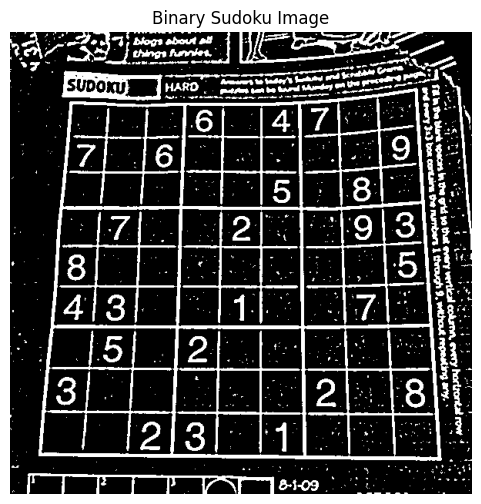

Total contours found: 1110


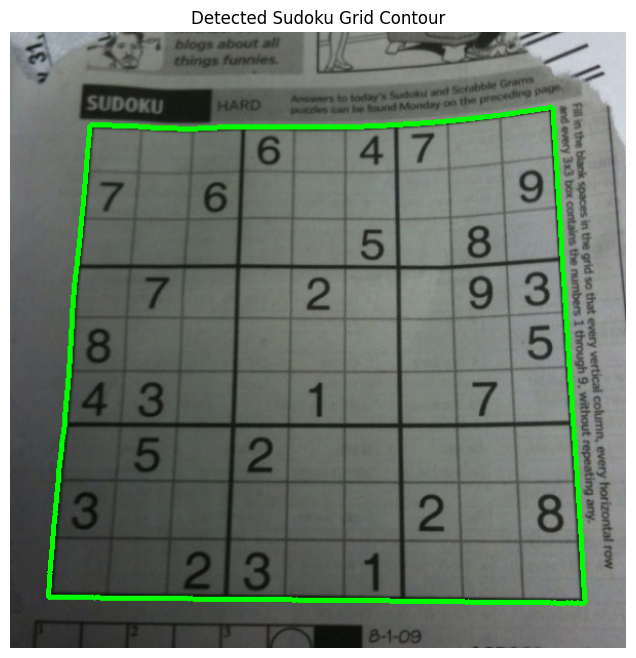

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load Sudoku image
img = cv2.imread("sudoku.png")

if img is None:
    raise FileNotFoundError("sudoku.jpg not found. Upload the image first.")

# Resize for easier processing
img = cv2.resize(img, (600, 600))

# Convert to grayscale
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# Blur to remove noise
blur = cv2.GaussianBlur(gray, (5, 5), 0)

# Adaptive threshold (best for Sudoku)
thresh = cv2.adaptiveThreshold(
    blur, 255,
    cv2.ADAPTIVE_THRESH_GAUSSIAN_C,
    cv2.THRESH_BINARY_INV,
    11, 2
)

# Show threshold result
plt.figure(figsize=(6,6))
plt.imshow(thresh, cmap="gray")
plt.title("Binary Sudoku Image")
plt.axis("off")
plt.show()

# Find contours (use TREE because Sudoku has inner squares)
contours, hierarchy = cv2.findContours(
    thresh,
    cv2.RETR_TREE,
    cv2.CHAIN_APPROX_SIMPLE
)

print("Total contours found:", len(contours))

# Find largest contour (Sudoku outer border)
largest_contour = max(contours, key=cv2.contourArea)

# Draw largest contour
output = img.copy()
cv2.drawContours(output, [largest_contour], -1, (0, 255, 0), 3)

# Display result
output_rgb = cv2.cvtColor(output, cv2.COLOR_BGR2RGB)

plt.figure(figsize=(8,8))
plt.imshow(output_rgb)
plt.title("Detected Sudoku Grid Contour")
plt.axis("off")
plt.show()


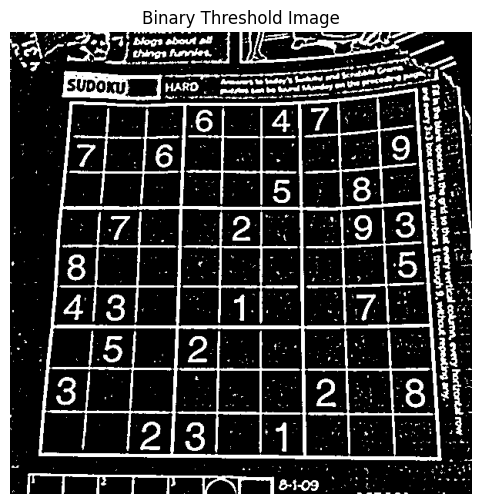

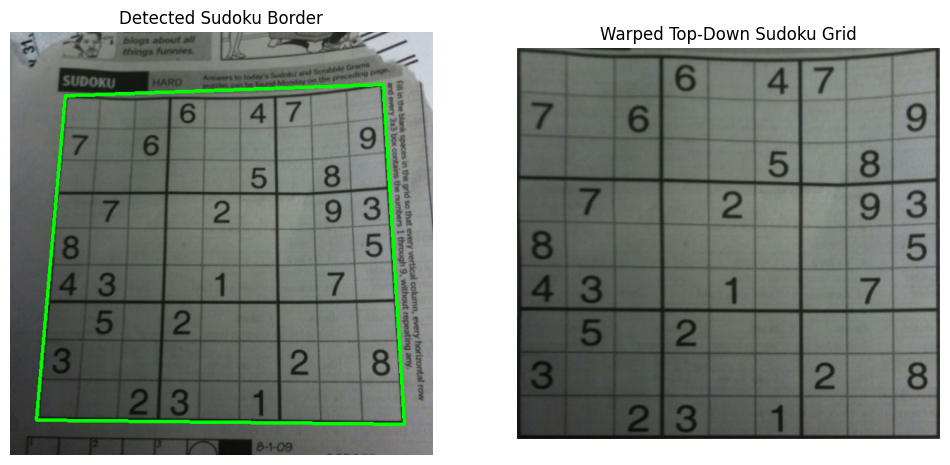

In [ ]:
# --- Sudoku Grid Detection + Perspective Warp (Google Colab Ready) ---

import cv2
import numpy as np
import matplotlib.pyplot as plt


# 2) Load image
img = cv2.imread("sudoku.png")

if img is None:
    raise FileNotFoundError("sudoku.jpg not found. Please upload it correctly.")

# Resize for consistency
img = cv2.resize(img, (600, 600))
original = img.copy()

# 3) Preprocessing
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
blur = cv2.GaussianBlur(gray, (5, 5), 0)

# Adaptive Threshold (best for grids)
thresh = cv2.adaptiveThreshold(
    blur, 255,
    cv2.ADAPTIVE_THRESH_GAUSSIAN_C,
    cv2.THRESH_BINARY_INV,
    11, 2
)

# Show threshold result
plt.figure(figsize=(6,6))
plt.imshow(thresh, cmap="gray")
plt.title("Binary Threshold Image")
plt.axis("off")
plt.show()

# 4) Find contours
contours, _ = cv2.findContours(
    thresh,
    cv2.RETR_EXTERNAL,
    cv2.CHAIN_APPROX_SIMPLE
)

# Largest contour should be Sudoku border
largest_contour = max(contours, key=cv2.contourArea)

# 5) Approximate contour to polygon (should have 4 corners)
epsilon = 0.02 * cv2.arcLength(largest_contour, True)
approx = cv2.approxPolyDP(largest_contour, epsilon, True)

if len(approx) != 4:
    raise ValueError("Sudoku grid not detected properly (corners != 4).")

# Order corner points correctly
pts = approx.reshape(4, 2)

def order_points(points):
    rect = np.zeros((4, 2), dtype="float32")

    s = points.sum(axis=1)
    rect[0] = points[np.argmin(s)]  # Top-left
    rect[2] = points[np.argmax(s)]  # Bottom-right

    diff = np.diff(points, axis=1)
    rect[1] = points[np.argmin(diff)]  # Top-right
    rect[3] = points[np.argmax(diff)]  # Bottom-left

    return rect

rect = order_points(pts)

# 6) Perspective Transform (Warp)
(tl, tr, br, bl) = rect

widthA = np.linalg.norm(br - bl)
widthB = np.linalg.norm(tr - tl)
maxWidth = int(max(widthA, widthB))

heightA = np.linalg.norm(tr - br)
heightB = np.linalg.norm(tl - bl)
maxHeight = int(max(heightA, heightB))

dst = np.array([
    [0, 0],
    [maxWidth - 1, 0],
    [maxWidth - 1, maxHeight - 1],
    [0, maxHeight - 1]
], dtype="float32")

# Compute transform matrix
M = cv2.getPerspectiveTransform(rect, dst)

# Warp Sudoku into top-down view
warped = cv2.warpPerspective(original, M, (maxWidth, maxHeight))

# 7) Show Results

# Draw detected contour on original
cv2.drawContours(img, [approx], -1, (0, 255, 0), 3)

img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
warped_rgb = cv2.cvtColor(warped, cv2.COLOR_BGR2RGB)

plt.figure(figsize=(12,6))

plt.subplot(1,2,1)
plt.imshow(img_rgb)
plt.title("Detected Sudoku Border")
plt.axis("off")

plt.subplot(1,2,2)
plt.imshow(warped_rgb)
plt.title("Warped Top-Down Sudoku Grid")
plt.axis("off")

plt.show()
